# **[Park Factors](https://www.pitcherlist.com/going-deep-what-barrels-tell-us-about-the-nuance-of-park-factors/)**
Author: Declan Costello

Date: 8/13/2023

## **Table of Context**

1. [Installation](#Installation)
2. [DF Setup Data](#DF-Setup)
3. [Pitcher Friendly Parks](#most-barreled-hrs-aka-pitcher-friendly-parks)
4. [Overall Pulled HR Parks](#overall-easiest-parks-to-pull-hrs)
4. [Lefty Batter Parks](#Lefty-Batter-Parks)
5. [Righty Batter Parks](#Righty-Batter-Parks)
6. [Future Analysis](#Future-Analysis)

# **Installation**

The following installs the necessary packages

In [2]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

/var/folders/vc/prq7ffv51gl630xh6bmjgj700000gp/T/ipykernel_3497/1573093577.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# **DF Setup**

In [3]:
def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [4]:
data = pd.read_csv('FE_data.csv')

hr_data = data[data['events'].isin(["home_run"])]

hr_data = hr_data.rename(columns={'Pop_percentile': 'Good_contact_pop_speed'})

hr_data = hr_data[['stand','home_team','pull_percent', "is_barrel", "Good_contact_pop_speed"]] #spray_angle

hr_data_grouped = hr_data.groupby('home_team')['pull_percent', 'is_barrel', 'Good_contact_pop_speed'].mean()

hr_data_grouped['pull_over_barrels'] = hr_data_grouped['pull_percent']/hr_data_grouped['is_barrel']

Lefty_hr_data = hr_data[hr_data['stand'].isin(["L"])]

Lefty_hr_data_grouped = Lefty_hr_data.groupby('home_team')['pull_percent', 'is_barrel','Good_contact_pop_speed'].mean()

Lefty_hr_data_grouped['pull_over_barrels'] = Lefty_hr_data_grouped['pull_percent']/Lefty_hr_data_grouped['is_barrel']

Righty_hr_data = hr_data[hr_data['stand'].isin(["R"])]

Righty_hr_data_grouped = Righty_hr_data.groupby('home_team')['pull_percent', 'is_barrel','Good_contact_pop_speed'].mean()

Righty_hr_data_grouped['pull_over_barrels'] = Righty_hr_data_grouped['pull_percent']/Righty_hr_data_grouped['is_barrel']

# **Most Barreled HRs aka Pitcher Friendly Parks**

These are pitcher friendly parks because you cannot get away with pulled hrs, you have to mash

**odd dodgers and cubs are so far away, considering my stadium tool said they have super similar stadiums shapes**

In [5]:
hr_data_grouped_sortedBy_is_barrel = hr_data_grouped.sort_values('is_barrel', ascending=False)
hr_data_grouped_sortedBy_Good_contact_pop_speed = hr_data_grouped.sort_values('Good_contact_pop_speed', ascending=False)

Lefty_hr_data_grouped_sortBy_pull_over_barrels

display_side_by_side([hr_data_grouped_sortedBy_is_barrel, hr_data_grouped_sortedBy_Good_contact_pop_speed],['Most Barreled HRs','Best Contact Quality HRs'])

,pull_percent,is_barrel,Good_contact_pop_speed,pull_over_barrels
home_team,,,,
KC,0.609036,0.420290,0.861330,1.449086
OAK,0.586290,0.391304,0.836955,1.498298
LAA,0.583133,0.388889,0.854027,1.499486
NYM,0.593727,0.385542,0.830644,1.539979
DET,0.616399,0.380952,0.844980,1.618046
PHI,0.604367,0.378505,0.841283,1.596722
BOS,0.604975,0.371585,0.840584,1.628095
SF,0.599788,0.371212,0.816082,1.615756
BAL,0.586133,0.366013,0.830693,1.601399


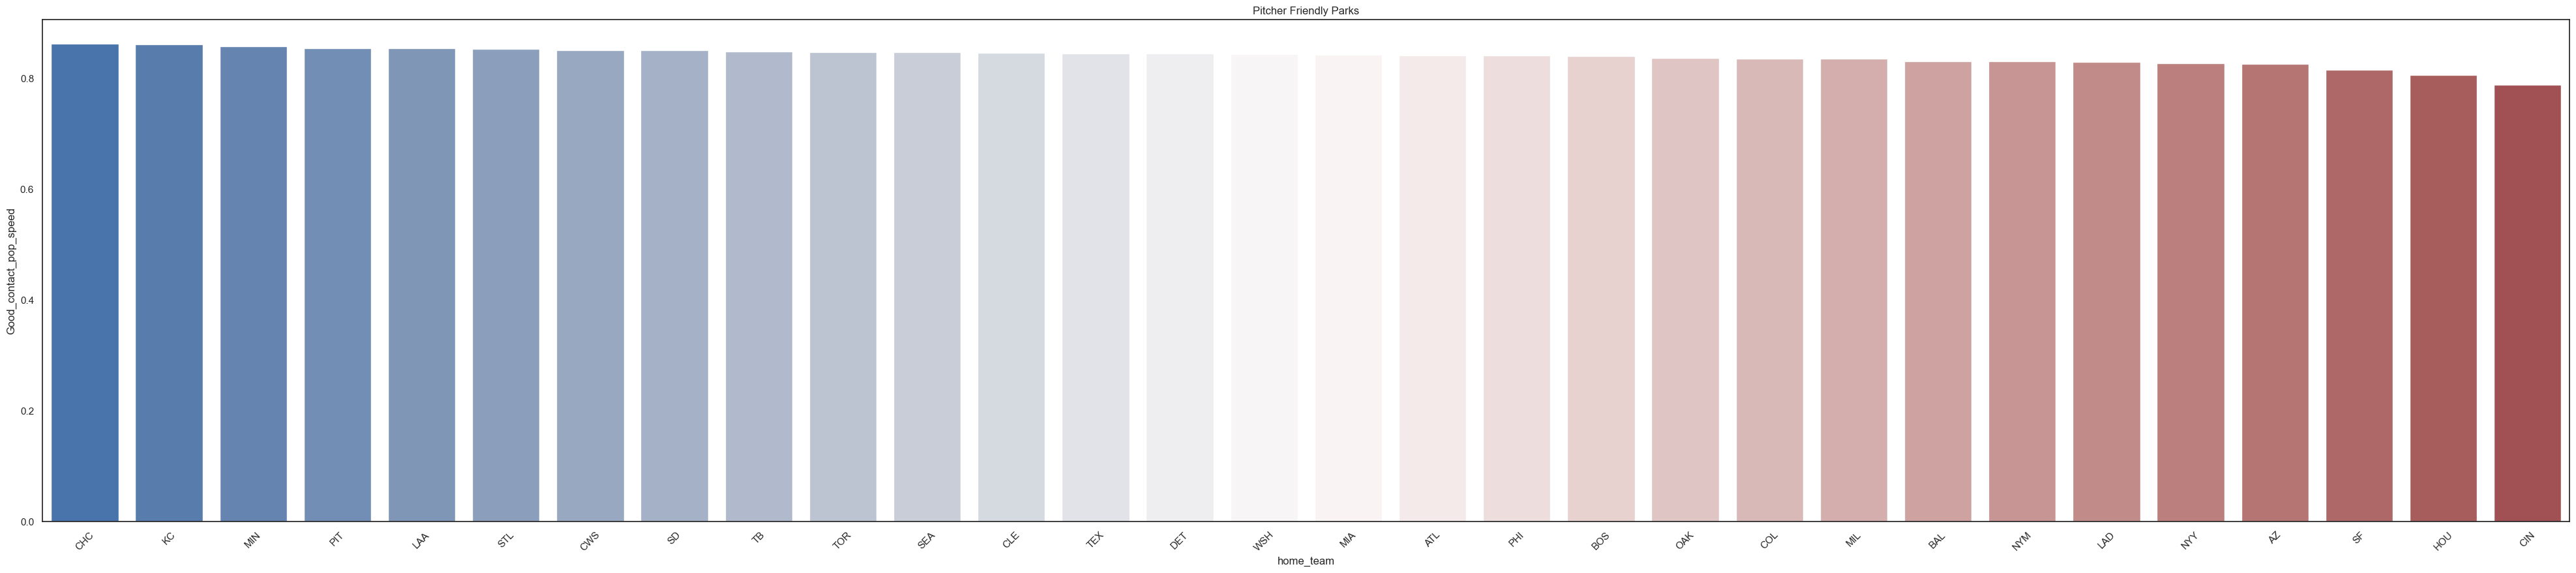

In [6]:
plt.figure(figsize=(50,10))
sns.set_theme(style="white")

hr_data_grouped_sortedBy_Good_contact_pop_speed = hr_data_grouped_sortedBy_Good_contact_pop_speed.reset_index()

g= sns.barplot(x=hr_data_grouped_sortedBy_Good_contact_pop_speed['home_team'], y=hr_data_grouped_sortedBy_Good_contact_pop_speed['Good_contact_pop_speed'], palette="vlag")

g.set_xticklabels(g.get_xticklabels(), rotation=45)

plt.title('Pitcher Friendly Parks')

plt.show()

# **Overall Easiest Parks to Pull HRs**

- Tbh this strange when not seperating rightys and leftys

In [7]:
hr_data_grouped_sortBy_pull_percent = hr_data_grouped.sort_values('pull_percent', ascending=False)
hr_data_grouped_sortBy_pull_over_barrels = hr_data_grouped.sort_values('pull_over_barrels', ascending=False)

display_side_by_side([hr_data_grouped_sortBy_pull_percent, hr_data_grouped_sortBy_pull_over_barrels],['Most Pulled HRs','Most Pull:Barrel HRs'])

,pull_percent,is_barrel,Good_contact_pop_speed,pull_over_barrels
home_team,,,,
STL,0.635596,0.317647,0.852697,2.000949
AZ,0.629858,0.333333,0.826208,1.889574
TB,0.621691,0.308176,0.849128,2.017324
SD,0.618313,0.358824,0.851213,1.723166
MIN,0.617880,0.350282,0.858171,1.763949
DET,0.616399,0.380952,0.844980,1.618046
PIT,0.614282,0.361446,0.854186,1.699514
COL,0.611949,0.358852,0.835848,1.705299
SEA,0.611812,0.314433,0.846991,1.945762


# **Easiest Parks for Lefty Batters**

In [12]:
Lefty_hr_data_grouped_sortBy_pull_percent = Lefty_hr_data_grouped.sort_values('pull_percent', ascending=False)
Lefty_hr_data_grouped_sortBy_pull_over_barrels = Lefty_hr_data_grouped.sort_values('pull_over_barrels', ascending=False)

Lefty_hr_data_grouped_sortBy_pull_percent.pop('Good_contact_pop_speed')
Lefty_hr_data_grouped_sortBy_pull_percent.pop('is_barrel')

Lefty_hr_data_grouped_sortBy_pull_over_barrels.pop('Good_contact_pop_speed')
Lefty_hr_data_grouped_sortBy_pull_over_barrels.pop('is_barrel')

display_side_by_side([Lefty_hr_data_grouped_sortBy_pull_percent, Lefty_hr_data_grouped_sortBy_pull_over_barrels],['Most Lefty Pulled HRs','Most Lefty Pull:Barrel HRs'])

,pull_percent,pull_over_barrels
home_team,,
TB,0.654084,1.899958
STL,0.647681,2.042686
SEA,0.644909,1.758843
NYY,0.641632,1.873567
PIT,0.629903,1.852655
ATL,0.629610,2.518439
AZ,0.628851,2.318887
CWS,0.628542,1.955464
HOU,0.624928,2.720273


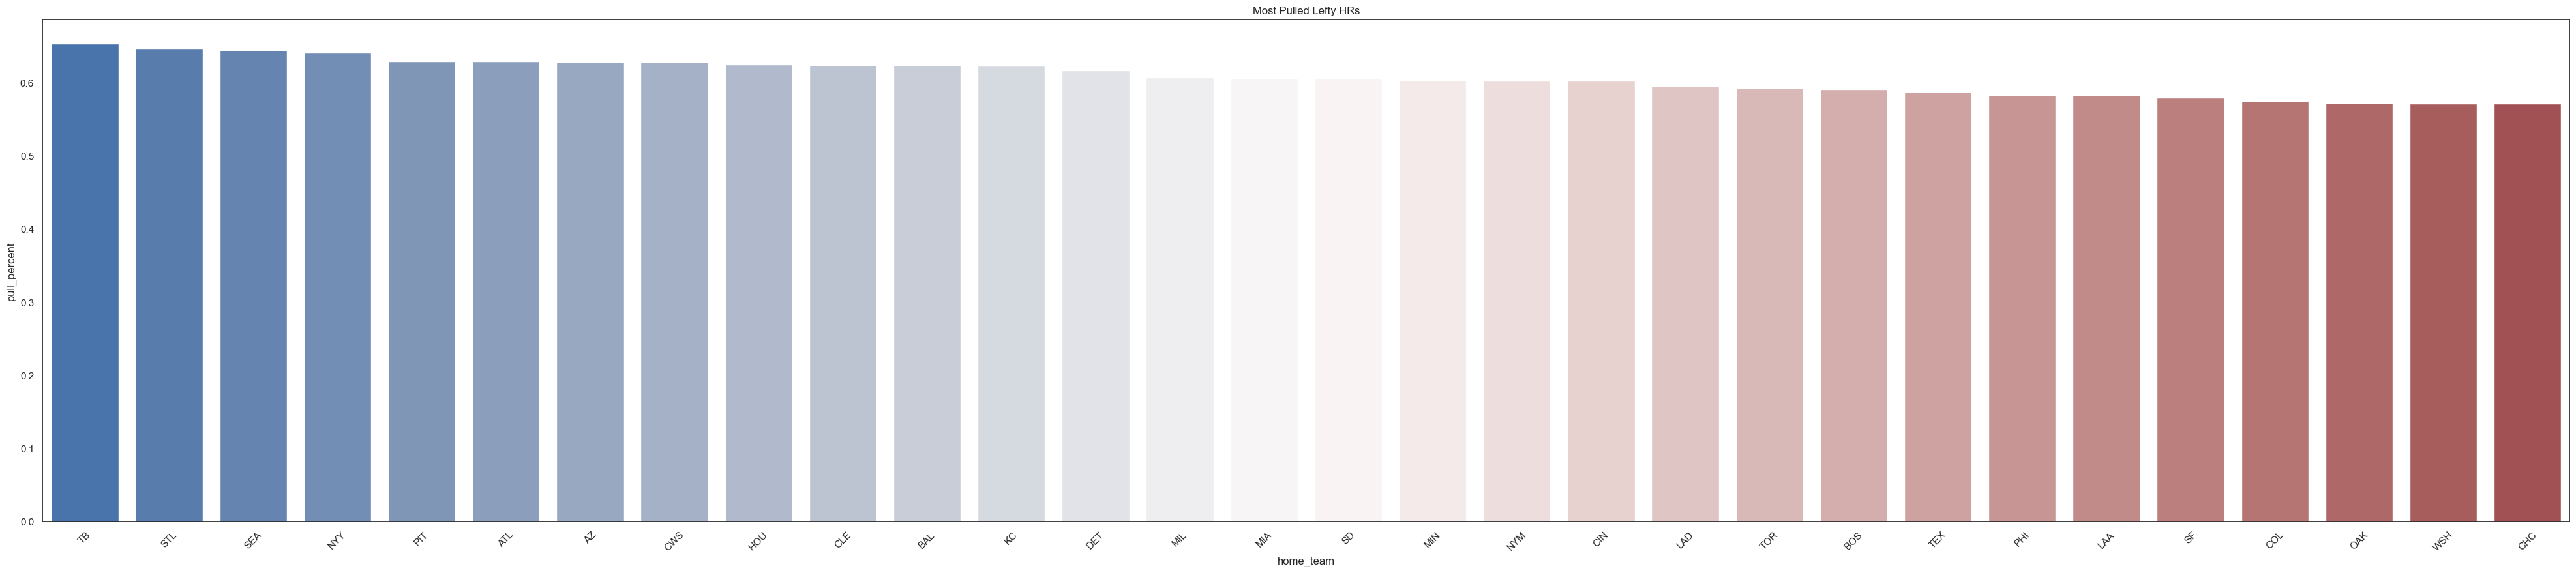

In [9]:
plt.figure(figsize=(50,10))
sns.set_theme(style="white")

Lefty_hr_data_grouped_sortBy_pull_percent = Lefty_hr_data_grouped_sortBy_pull_percent.reset_index()

g= sns.barplot(x=Lefty_hr_data_grouped_sortBy_pull_percent['home_team'], y=Lefty_hr_data_grouped_sortBy_pull_percent['pull_percent'], palette="vlag")

g.set_xticklabels(g.get_xticklabels(), rotation=45)

plt.title('Most Pulled Lefty HRs')

plt.show()

# **Easiest Parks for Righty Batters**

In [11]:
Righty_hr_data_grouped_sortBy_pull_percent = Righty_hr_data_grouped.sort_values('pull_percent', ascending=False)
Righty_hr_data_grouped_sortBy_pull_over_barrels = Righty_hr_data_grouped.sort_values('pull_over_barrels', ascending=False)

Righty_hr_data_grouped_sortBy_pull_percent.pop('Good_contact_pop_speed')
Righty_hr_data_grouped_sortBy_pull_percent.pop('is_barrel')

Righty_hr_data_grouped_sortBy_pull_over_barrels.pop('Good_contact_pop_speed')
Righty_hr_data_grouped_sortBy_pull_over_barrels.pop('is_barrel')

display_side_by_side([Righty_hr_data_grouped_sortBy_pull_percent, Righty_hr_data_grouped_sortBy_pull_over_barrels],['Most Righty Pulled HRs','Most Righty Pull:Barrel HRs'])

,pull_percent,pull_over_barrels
home_team,,
STL,0.631754,1.987715
COL,0.631200,1.801550
AZ,0.630452,1.703925
SD,0.627075,1.591806
MIN,0.626294,2.044665
PHI,0.621786,1.653387
DET,0.615770,1.589085
SF,0.613285,1.863444
BOS,0.612860,1.512590


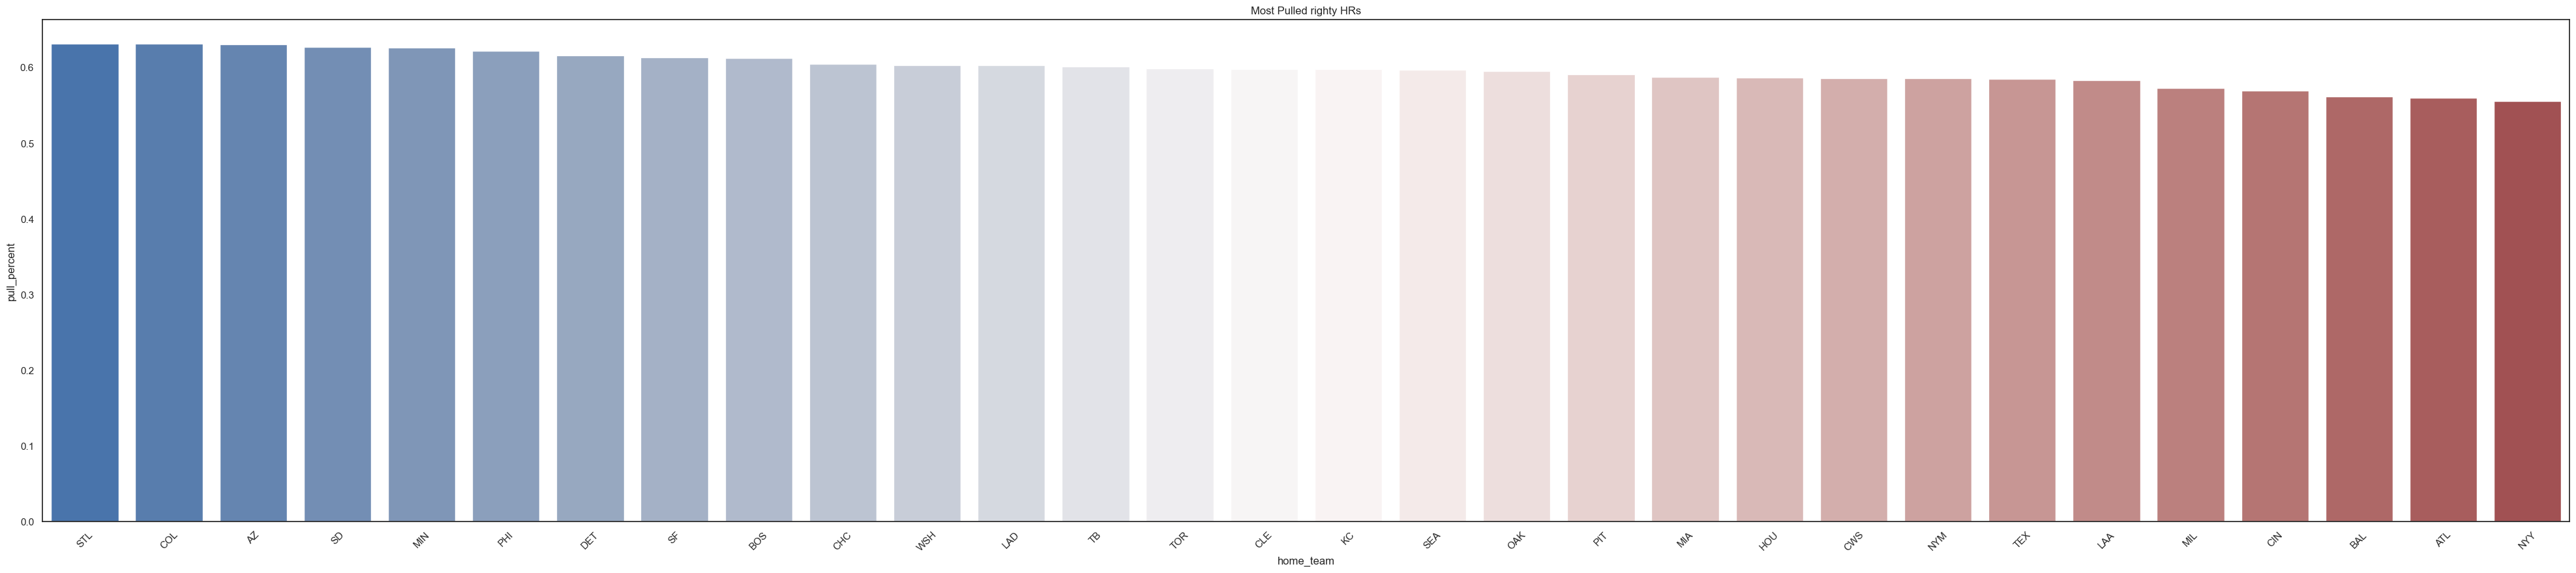

In [10]:
plt.figure(figsize=(50,10))
sns.set_theme(style="white")

Righty_hr_data_grouped_sortBy_pull_percent = Righty_hr_data_grouped_sortBy_pull_percent.reset_index()

g= sns.barplot(x=Righty_hr_data_grouped_sortBy_pull_percent['home_team'], y=Righty_hr_data_grouped_sortBy_pull_percent['pull_percent'], palette="vlag")

g.set_xticklabels(g.get_xticklabels(), rotation=45)

plt.title('Most Pulled righty HRs')

plt.show()

# **Future Analysis**

- Use Ground Ball events to evaluate defenses